In [1]:
import pandas as pd
from io import StringIO

In [19]:
data = """
| Detector | Descriptor | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 | 12 | 13 | 14 | 15 | 16 | 17 | 18 |
|----------|------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
| AKAZE    | AKAZE      | 12.4517 | 15.129 | 13.0048 | 14.7365 | 16.4128 | 13.3503 | 15.263 | 14.6187 | 14.1544 | 11.6663 | 12.2208 | 11.3941 | 10.7457 | 10.4941 | 10.5656 | 10.1634 | 9.37525 | 9.09517 |
| AKAZE    | BRIEF      | 13.4291 | 15.36 | 13.282 | 14.6488 | 15.7699 | 13.6596 | 15.7714 | 14.5221 | 14.1284 | 11.8997 | 13.0979 | 12.2358 | 10.2739 | 10.3057 | 9.44687 | 10.2421 | 9.63517 | 9.26466 |
| AKAZE    | BRISK      | 12.1088 | 14.7123 | 13.5967 | 14.3224 | 14.1246 | 15.4276 | 15.8181 | 14.5169 | 14.0406 | 11.6769 | 12.3302 | 11.3559 | 10.5128 | 10.4807 | 9.58383 | 10.1454 | 9.43337 | 9.01418 |
| AKAZE    | FREAK      | 12.7436 | 14.1252 | 14.0465 | 14.0598 | 15.1106 | 14.1789 | 15.6829 | 13.8281 | 13.0894 | 11.7429 | 12.2123 | 10.9172 | 10.9484 | 10.0467 | 9.38789 | 9.8844 | 9.5547 | 8.87455 |
| AKAZE    | ORB        | 12.8353 | 14.688 | 13.2145 | 14.0442 | 16.2215 | 14.1913 | 15.8683 | 14.232 | 13.9301 | 11.4459 | 12.1617 | 11.5662 | 10.7235 | 10.4809 | 9.71794 | 10.3911 | 9.1771 | 9.04323 |
| AKAZE    | SIFT      | 13.3689 | 13.0305 | 12.3202 | 12.7521 | 12.2747 | 13.7449 | 12.9000 | 12.6218 | 11.4559 | 12.7376 | 11.4265 | 11.7285 | 12.6532 | 11.8116 | 9.3867 | 11.1041 | 11.7264 | 9.8741 |
| BRISK    | AKAZE      | 13.7746 | 13.3080 | 11.3769 | 13.0851 | 12.3342 | 13.0781 | 14.6347 | 11.7556 | 11.4926 | 12.2700 | 11.7611 | 11.3997 | 12.2277 | 11.0014 | 11.1203 | 12.1848 | 10.5710 | 9.4789 |
| BRISK    | BRIEF      | 13.9499 | 19.2481 | 13.2508 | 19.5523 | 31.28 | 20.3483 | 18.3439 | 19.002 | 15.7272 | 12.5995 | 12.4479 | 15.2107 | 13.2212 | 10.7259 | 11.3316 | 13.6699 | 11.6769 | 9.9206 |
| BRISK    | BRISK      | 13.6228 | 15.7343 | 12.2945 | 17.6126 | 29.7535 | 15.0349 | 18.5753 | 16.0991 | 15.181 | 15.2853 | 13.4277 | 12.0041 | 12.8003 | 11.3962 | 12.4357 | 10.7713 | 9.5608 | 11.0392 |
| BRISK    | FREAK      | 14.5351 | 23.5931 | 16.615 | 14.2001 | 28.8633 | 16.7515 | 15.0635 | 18.0133 | 19.5803 | 14.0984 | 12.8755 | 13.1137 | 12.5763 | 12.2982 | 13.2241 | 10.6017 | 9.05128 | 11.1175 |
| BRISK    | ORB        | 13.692 | 16.1031 | 13.4982 | 18.1021 | 22.7929 | 16.118 | 19.2797 | 16.0691 | 13.2068 | 12.7424 | 14.9563 | 10.86 | 11.5153 | 11.7967 | 12.5293 | 10.5399 | 10.2016 | 10.8431 |
| BRISK    | SIFT       | 13.6030 | 13.2121 | 12.8840 | 12.1046 | 11.7035 | 13.5266 | 13.2491 | 12.0155 | 11.3526 | 14.1452 | 11.4238 | 11.9654 | 12.3050 | 11.4823 | 10.3981 | 11.7356 | 12.1119 | 9.1158 |
| FAST     | AKAZE      | 13.7616 | 11.8519 | 11.4126 | 13.3479 | 11.6402 | 14.2385 | 12.6612 | 12.1048 | 11.8703 | 12.1142 | 11.9599 | 11.5628 | 13.3476 | 12.2526 | 10.2780 | 9.3482 | 11.5895 | 7.1578 |
| FAST     | BRIEF      | 10.8147 | 11.3421 | 14.5896 | 15.0321 | 24.337 | 13.497 | 12.4346 | 12.8279 | 12.1254 | 13.8688 | 14.0835 | 11.079 | 12.4657 | 11.427 | 12.1527 | 11.9889 | 8.42531 | 11.7648 |
| FAST     | BRISK      | 12.3423 | 12.3534 | 16.6259 | 13.2296 | 102.236 | 14.203 | 0 | 11.4489 | 13.2947 | 13.4789 | 14.0007 | 11.6 | 12.5265 | 12.2389 | 11.8818 | 12.4833 | 8.7514 | 12.6126 |
| FAST     | FREAK      | 12.3974 | 26.3022 | 14.5874 | 14.9931 | 46.9814 | 13.3994 | 13.4072 | 11.7604 | 12.4292 | 13.497 | 13.7169 | 11.862 | 12.2073 | 11.4895 | 11.6077 | 12.2638 | 8.69116 | 11.9816 |
| FAST     | ORB        | 11.079 | 11.1504 | 11.9033 | 12.9563 | 22.0638 | 13.2691 | 11.8507 | 11.4368 | 12.3793 | 13.4789 | 13.5025 | 11.1627 | 12.1009 | 10.9713 | 11.3852 | 11.4409 | 8.18455 | 11.0927 |
| FAST     | SIFT       | 12.5951 | 12.8061 | 15.9577 | 12.8743 | 19.0241 | 12.3765 | 12.1337 | 11.7417 | 12.7138 | 12.1169 | 12.3130 | 11.7126 | 12.5109 | 11.6271 | 11.7805 | 12.1996 | 7.1622 | 12.6406 |
| HARRIS   | AKAZE      | 9.0383 | 12.4967 | 13.1526 | 12.9991 | 30.2967 | 12.1823 | 10.9093 | 11.8219 | 13.1962 | 12.9660 | 14.2702 | 11.5615 | 12.2730 | 11.1134 | 11.7034 | 11.8423 | 10.5155 | 10.9396 |
| HARRIS   | BRIEF      | 11.6549 | 12.3453 | 13.8862 | 12.3607 | 16.9679 | 12.5964 | 11.5131 | 11.1934 | 12.8545 | 12.3032 | 13.0011 | 12.5637 | 12.5210 | 11.8781 | 11.5554 | 11.8668 | 9.2723 | 12.0558 |
| HARRIS   | BRISK      | 10.9082 | 80.7525 | -11.4731 | 11.5792 | 44.9166 | 12.9945 | 15.8978 | 17.6204 | 0 | -153.93 | 11.7414 | 11.6948 | 568.322 | 7.72144 | -12.639 | 6.71705 | 12.7384 | 0 |
| HARRIS   | FREAK      | 9.74953 | 63.8475 | 0 | 11.7693 | 0 | 13.5907 | 13.497 | 12.9162 | 0 | 10.2931 | 11.8135 | 0 | 13.4327 | 12.288 | -25.2781 | 6.71705 | 12.5848 | 25.6763 |
| HARRIS   | ORB        | 12.0086 | 12.4790 | 16.9876 | 13.6805 | 14.5341 | 12.0086 | 12.1961 | 12.0531 | 12.0008 | 12.4915 | 13.0068 | 12.1920 | 12.4660 | 11.1365 | 10.4000 | 12.2027 | 7.7723 | 11.0883 |
| HARRIS   | SIFT       | 12.8659 | 16.5957 | 12.7803 | 14.8405 | 28.6365 | 17.8323 | 15.5593 | 15.9199 | 13.9678 | 10.6552 | 12.1394 | 11.1097 | 11.5717 | 12.4212 | 12.4717 | 10.9329 | 10.3503 | 12.3517 |
| SHITOMASI  | AKAZE      | 10.1889 | 16.1327 | 11.5662 | 17.8398 | 20.4757 | 20.6042 | 14.0882 | 19.1151 | 14.6993 | 10.1762 | 11.6251 | 12.6855 | 11.5071 | 10.7809 | 10.6437 | 11.7206 | 10.7937 | 9.9639    |
| SHITOMASI  | BRIEF      | 15.1954| 14.5142| 10.169 | 17.0112| 12.9056| 13.9102| 16.9035| 12.3124| 12.1006| 12.8404| 12.0062| 11.9426| 12.0974| 11.7101| 12.5033| 9.54359| 11.3027| 8.97434|
| SHITOMASI  | BRISK      | 18.1263| 14.4784| 14.9052| 12.5354| 13.1511| 13.0553| 12.4166| 13.9   | 11.272 | 23.5898| 12.3725| 11.8481| 11.4066| 13.4783| 10.3618| 12.8474| 11.1675| 9.68408|
| SHITOMASI  | FREAK      | 16.4617| 14.2792| 11.3852| 14.0567| 13.0229| 16.2001| 12.5506| 12.0533| 12.2391| 13.8246| 11.8783| 11.848 | 12.439 | 11.8034| 11.414 | 11.0542| 10.979 | 10.5668|
| SHITOMASI  | ORB        | 13.6546| 11.5539| 12.4947| 13.5019| 12.3   | 13.4042| 13.3068| 12.0642| 11.4559| 14.1585| 11.6463| 11.6524| 11.8541| 11.6524| 10.6921| 10.5345| 9.79746| 8.40486|
| SHITOMASI  | SIFT       | 11.7327 | 15.8290 | 14.2885 | 17.1298 | 23.8766 | 19.9254 | 12.1339 | 16.6220 | 15.1317 | 11.2550 | 13.4938 | 11.7882 | 11.6125 | 12.2443 | 10.8762 | 10.8778 | 8.6227 | 11.6691    |
| SIFT       | AKAZE      | 11.2939 | 19.6872 | 12.2048 | 14.8405 | 19.9198 | 23.0077 | 12.0534 | 15.3088 | 17.9749 | 12.7661 | 12.5041 | 10.8801 | 11.9619 | 12.2145 | 14.4302 | 9.9733 | 9.3526 | 11.5113    |
| SIFT       | BRIEF      | 12.2613| 12.9985| 14.3121| 22.0509| 14.7482| 11.2401| 13.3426| 16.8392| 13.4839| 10.5587| 12.1814| 9.94223| 10.0344| 9.39924| 8.99601| 8.95836| 8.68938| 9.68036|
| SIFT       | BRISK      | 13.2076| 13.189 | 13.1006| 22.5363| 14.9931| 10.7559| 16.1856| 13.0799| 12.9974| 10.5289| 11.1025| 11.0745| 9.40235| 9.33664| 9.69312| 9.13533| 8.86778| 10.2049|
| SIFT       | FREAK      | 11.619 | 13.5114| 13.097 | 19.6447| 14.1656| 11.3573| 15.4832| 14.4328| 17.2364| 10.6528| 11.4029| 12.4629| 9.57406| 9.64045| 9.46577| 9.24358| 8.79259| 9.25026|
| SIFT       | ORB        | 11.8455 | 13.1113 | 13.0918 | 13.3027 | 13.1974 | 12.6651 | 15.6477 | 13.6024 | 14.1673 | 12.4350 | 12.0939 | 10.3743 | 10.4123 | 9.7046 | 9.4816 | 10.0682 | 8.6965 | 8.6708    |
| SIFT       | SIFT       | 12.1010 | 13.5190 | 12.0061 | 13.3839 | 14.0406 | 12.4618 | 15.4674 | 14.6608 | 12.5431 | 11.9802 | 12.9386 | 11.1953 | 10.9342 | 10.8077 | 9.5352 | 9.5305 | 8.8035 | 8.4966    |
| ORB      | AKAZE      | 11.6102 | 13.5195 | 12.7450 | 14.3365 | 13.6303 | 13.6516 | 15.3947 | 13.8281 | 12.7144 | 11.7826 | 12.3501 | 10.6091 | 10.9959 | 9.7715 | 10.1374 | 9.7899 | 9.2147 | 9.0744    |
| ORB      | BRIEF      | 13.292 | 15.6008| 17.3294| 20.7855| 15.9662| 24.1485| 15.0795| 16.2559| 15.7678| 14.5172| 14.1684| 12.4537| 12.6871| 10.8504| 11.4138| 11.2578| 10.177 | 10.9209|
| ORB      | BRISK      | 14.1244| 25.6861| 18.3872| 17.9628| 28.4239| 14.2184| 12.2072| 12.3426| 12.8979| 14.3788| 13.1039| 12.3629| 12.1582| 10.4887| 11.1169| 12.314 | 11.0236| 11.979 |
| ORB      | FREAK      | 12.757 | 24.0006| 18.8221| 14.1071| 21.9165| 14.2442| 12.7319| 14.2682| 13.0998| 13.6282| 12.7046| 11.8232| 11.3969| 11.4982| 11.01  | 11.26  | 10.4408| 13.3909|
| ORB      | SIFT       | 11.5026 | 12.7074 | 12.8270 | 13.9335 | 14.0043 | 14.0250 | 15.3221 | 13.1173 | 11.5627 | 11.7715 | 11.5160 | 10.5463 | 10.1861 | 10.0381 | 9.3857 | 9.9765 | 8.4601 | 8.7303    |
| ORB      | ORB        | 12.9535| 15.6244| 12.2424| 15.7528| 24.9117| 20.2154| 15.8777| 12.981 | 15.0266| 14.5192| 14.6059| 11.0872| 11.6048| 10.2144| 10.6207| 11.6182| 10.4888| 11.4614|
"""

In [20]:
# read data
df = pd.read_csv(StringIO(data), sep="|", skiprows=0, skipinitialspace=False)
df = df.drop(df.columns[0], axis=1)
df = df.drop(df.columns[-1], axis=1)
# remove the first row
df = df.drop(df.index[0])
df = df.reset_index(drop=True)

In [21]:
df.columns = df.columns.str.strip()

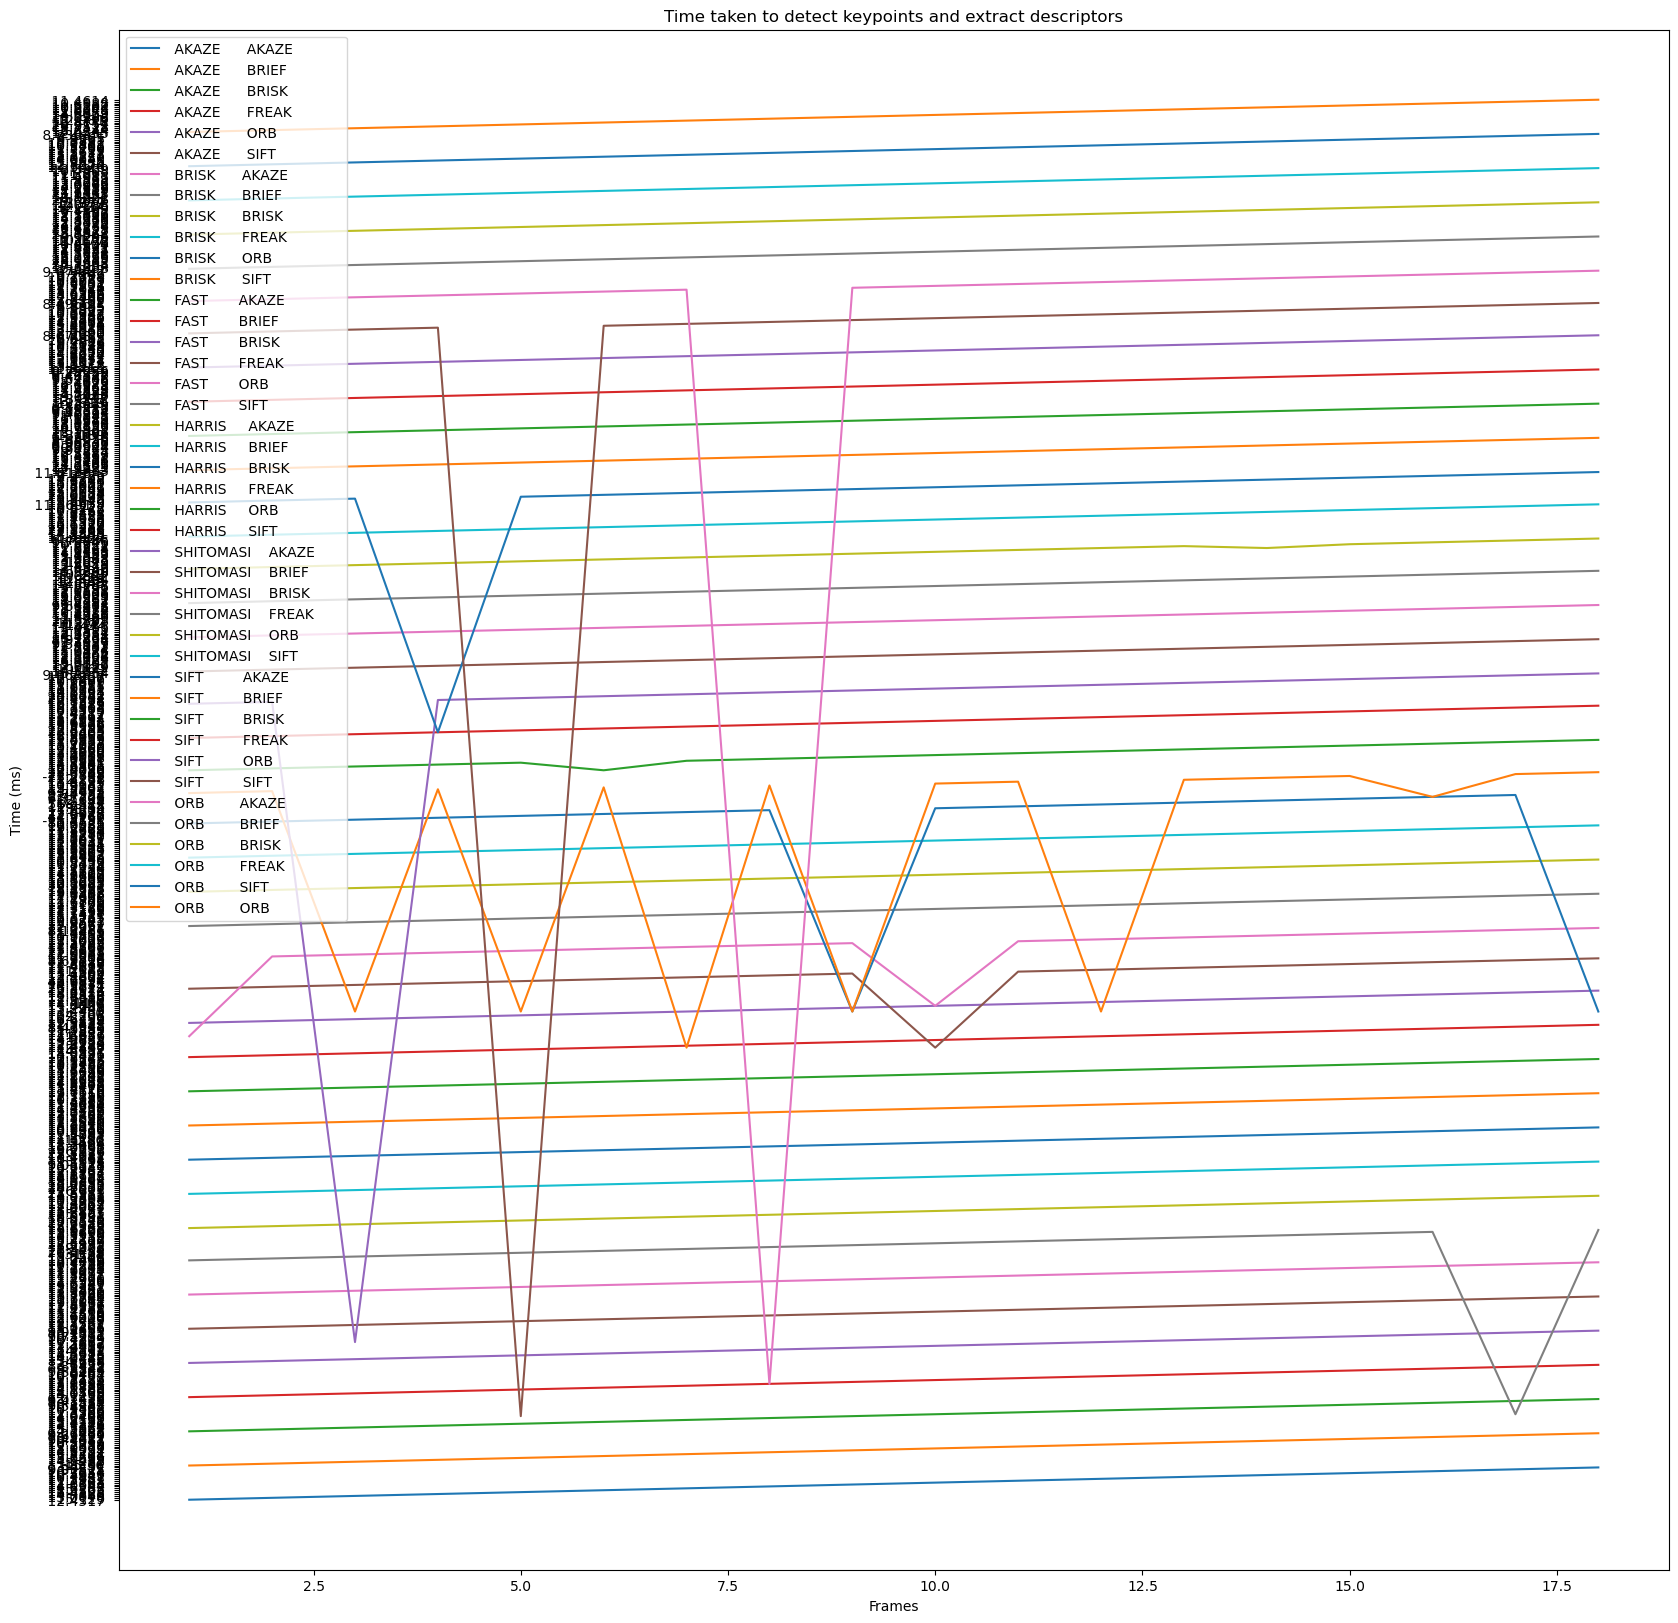

In [22]:
# plot a line graph for each detector and descriptor from 1-18 columns
import matplotlib.pyplot as plt
import numpy as np

# set the figure size
plt.figure(figsize=(20, 20))

# set the x-axis values
x = np.arange(1, 19)

# set the y-axis values
for i in range(0, len(df)):
    y = df.loc[i, df.columns[2:]].values

    # plot the line graph
    plt.plot(x, y, label=df.loc[i, 'Detector'] + ' ' + df.loc[i, 'Descriptor'])

plt.legend()
plt.xlabel('Frames')
plt.ylabel('Time (ms)')
plt.title('Time taken to detect keypoints and extract descriptors')
plt.show()

In [25]:
for column in df.columns[2:]:
    df[column] = df[column].astype(float)

In [26]:
# Calculate the mean and standard deviation for each detector and descriptor in all the 18 images
df['mean'] = df[df.columns[2:]].mean(axis=1)
df['std'] = df[df.columns[2:]].std(axis=1)

In [27]:
df

,Detector,Descriptor,1,2,3,4,5,6,7,8,...,11,12,13,14,15,16,17,18,mean,std
0,AKAZE,AKAZE,12.45170,15.1290,13.0048,14.7365,16.4128,13.3503,15.2630,14.6187,...,12.2208,11.39410,10.74570,10.49410,10.56560,10.16340,9.37525,9.09517,12.491201,2.143701
1,AKAZE,BRIEF,13.42910,15.3600,13.2820,14.6488,15.7699,13.6596,15.7714,14.5221,...,13.0979,12.23580,10.27390,10.30570,9.44687,10.24210,9.63517,9.26466,12.609617,2.200852
2,AKAZE,BRISK,12.10880,14.7123,13.5967,14.3224,14.1246,15.4276,15.8181,14.5169,...,12.3302,11.35590,10.51280,10.48070,9.58383,10.14540,9.43337,9.01418,12.400071,2.156359
3,AKAZE,FREAK,12.74360,14.1252,14.0465,14.0598,15.1106,14.1789,15.6829,13.8281,...,12.2123,10.91720,10.94840,10.04670,9.38789,9.88440,9.55470,8.87455,12.246336,2.084009
4,AKAZE,ORB,12.83530,14.6880,13.2145,14.0442,16.2215,14.1913,15.8683,14.2320,...,12.1617,11.56620,10.72350,10.48090,9.71794,10.39110,9.17710,9.04323,12.440709,2.177417
5,AKAZE,SIFT,13.36890,13.0305,12.3202,12.7521,12.2747,13.7449,12.9000,12.6218,...,11.4265,11.72850,12.65320,11.81160,9.38670,11.10410,11.72640,9.87410,12.050983,1.100635
6,BRISK,AKAZE,13.77460,13.3080,11.3769,13.0851,12.3342,13.0781,14.6347,11.7556,...,11.7611,11.39970,12.22770,11.00140,11.12030,12.18480,10.57100,9.47890,12.047483,1.194045
7,BRISK,BRIEF,13.94990,19.2481,13.2508,19.5523,31.2800,20.3483,18.3439,19.0020,...,12.4479,15.21070,13.22120,10.72590,11.33160,13.66990,11.67690,9.92060,15.639261,4.959656
8,BRISK,BRISK,13.62280,15.7343,12.2945,17.6126,29.7535,15.0349,18.5753,16.0991,...,13.4277,12.00410,12.80030,11.39620,12.43570,10.77130,9.56080,11.03920,14.590478,4.373776
9,BRISK,FREAK,14.53510,23.5931,16.6150,14.2001,28.8633,16.7515,15.0635,18.0133,...,12.8755,13.11370,12.57630,12.29820,13.22410,10.60170,9.05128,11.11750,15.342882,4.687630


In [33]:
Lidar_times = [12.5156 ,12.6142 ,14.091 ,16.6894 ,15.9082 ,12.6787 ,11.9844 ,13.1241 ,13.0241 ,11.1746 ,12.8086 ,8.95978 ,9.96439 ,9.59863 ,8.57352 ,9.51617 ,9.54658 ,8.3988]

ValueError: Sample larger than population or is negative

In [40]:
df["Descriptor"].str.strip().to_numpy()

array(['AKAZE', 'BRIEF', 'BRISK', 'FREAK', 'ORB', 'SIFT', 'AKAZE',
       'BRIEF', 'BRISK', 'FREAK', 'ORB', 'SIFT', 'AKAZE', 'BRIEF',
       'BRISK', 'FREAK', 'ORB', 'SIFT', 'AKAZE', 'BRIEF', 'BRISK',
       'FREAK', 'ORB', 'SIFT', 'AKAZE', 'BRIEF', 'BRISK', 'FREAK', 'ORB',
       'SIFT', 'AKAZE', 'BRIEF', 'BRISK', 'FREAK', 'ORB', 'SIFT', 'AKAZE',
       'BRIEF', 'BRISK', 'FREAK', 'SIFT', 'ORB'], dtype=object)

In [35]:
df["mean"].to_numpy()

array([12.49120111, 12.60961667, 12.40007111, 12.24633556, 12.44070944,
       12.05098333, 12.04748333, 15.63926111, 14.59047778, 15.34288222,
       14.15813889, 12.12967222, 11.80553333, 13.01422833, 16.96155   ,
       15.19859222, 12.30046389, 12.57146667, 12.95988889, 12.35498889,
       35.30901056, 10.71653222, 12.26136111, 14.05566667, 13.58926667,
       12.663485  , 13.36646556, 12.66978333, 11.89604556, 13.8394    ,
       13.99361667, 12.20649333, 12.18841222, 12.279595  , 11.80935556,
       11.91141667, 11.95310556, 14.59288333, 14.73202778, 14.06112222,
       11.64513889, 13.98922778])